In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [6]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")

In [7]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)

In [4]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [27]:
application.iloc[:,30:60]

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE
0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383
1,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538
2,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172
307507,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451
307508,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894
307509,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,NaN,0.514163,0.661024,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,NaN,0.0126,NaN


In [8]:
cat = application.iloc[:,30:60].select_dtypes(include='object').columns
num = application.iloc[:,30:60].select_dtypes(exclude='object').columns
# print(num,"\n", cat)
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<5):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.iloc[:,30:60].select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE'],
      dtype='object') 
 Index(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')


,REGION_RATING_CLIENT,COUNT,TARGET,DEFAULTER_RATES
0,2,226984,1,7.889102
1,3,48330,1,11.102835
2,1,32197,1,4.820325


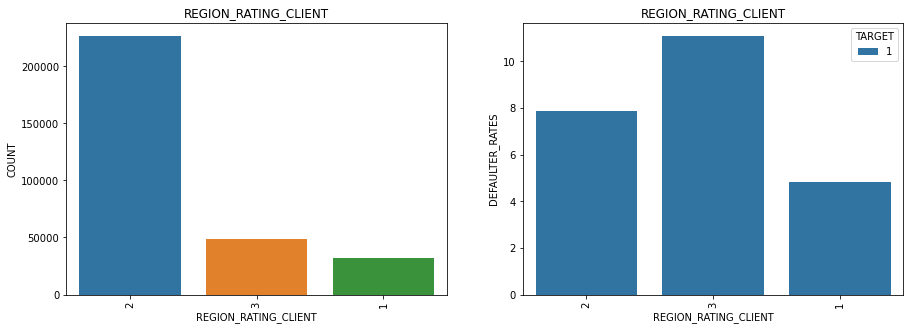

,REGION_RATING_CLIENT_W_CITY,COUNT,TARGET,DEFAULTER_RATES
0,2,229484,1,7.917763
1,3,43860,1,11.402189
2,1,34167,1,4.840928


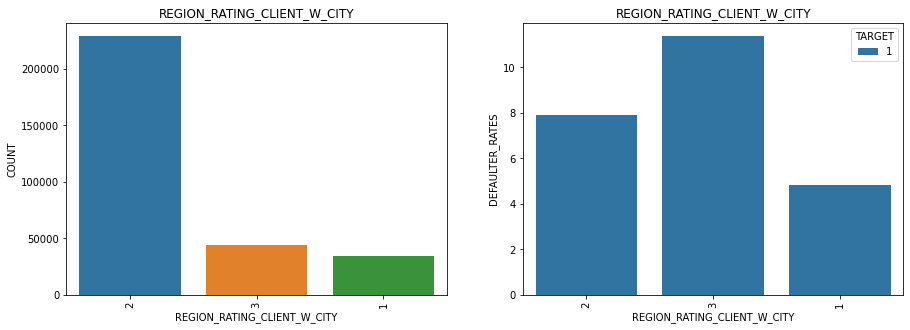

,WEEKDAY_APPR_PROCESS_START,COUNT,TARGET,DEFAULTER_RATES
0,TUESDAY,53901,1,8.350494
1,WEDNESDAY,51934,1,8.160357
2,MONDAY,50714,1,7.757227
3,THURSDAY,50591,1,8.100255
4,FRIDAY,50338,1,8.146927
5,SATURDAY,33852,1,7.887274
6,SUNDAY,16181,1,7.929053


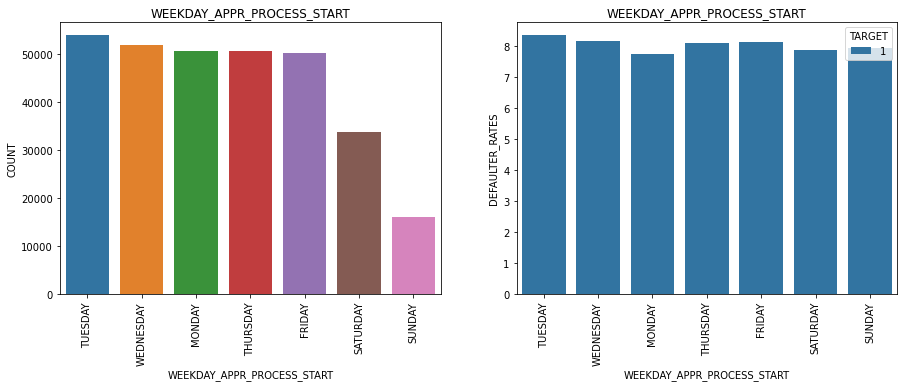

,REG_REGION_NOT_LIVE_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,302854,1,8.054046
1,1,4657,1,9.297831


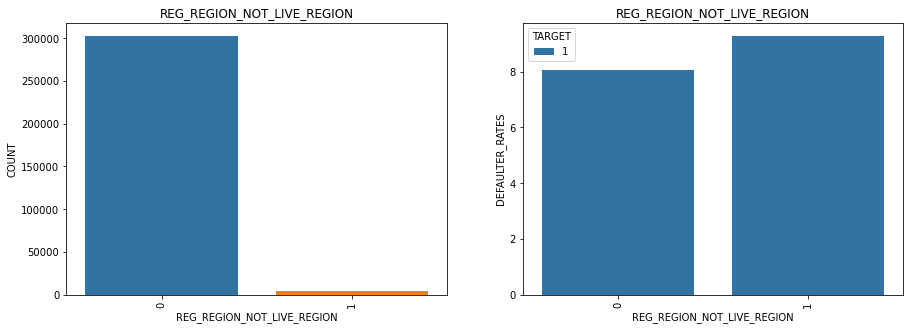

,REG_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,291899,1,8.029147
1,1,15612,1,8.890597


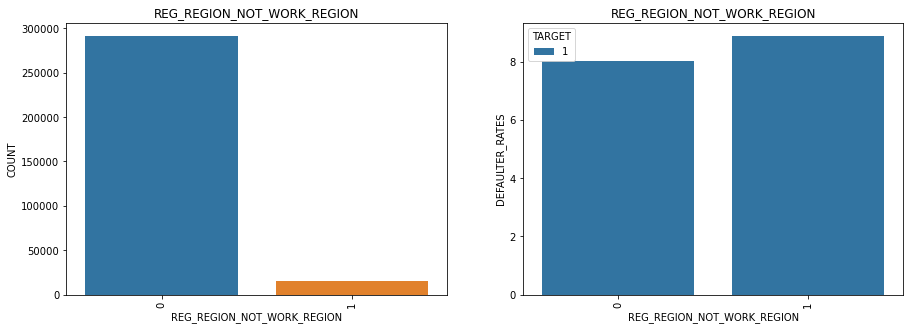

,LIVE_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,295008,1,8.057070
1,1,12503,1,8.445973


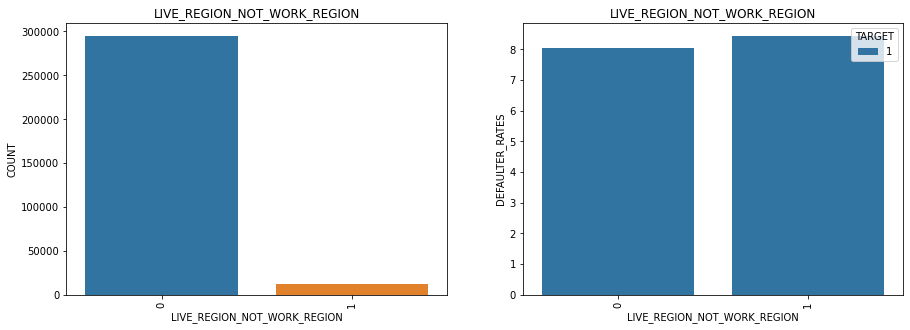

,REG_CITY_NOT_LIVE_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,283472,1,7.720692
1,1,24039,1,12.225966


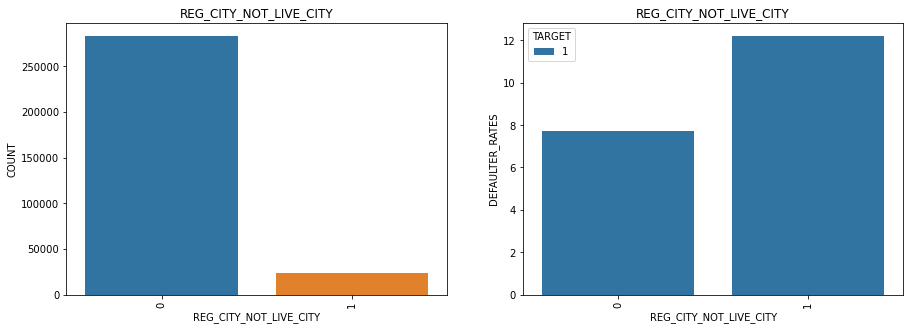

,REG_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,236644,1,7.312672
1,1,70867,1,10.611427


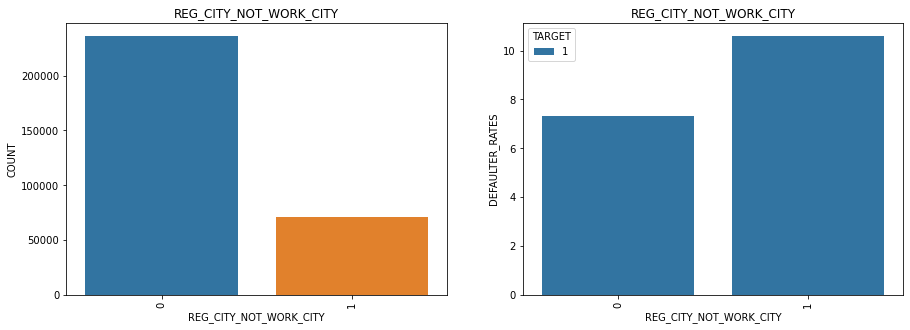

,LIVE_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,252296,1,7.658465
1,1,55215,1,9.966495


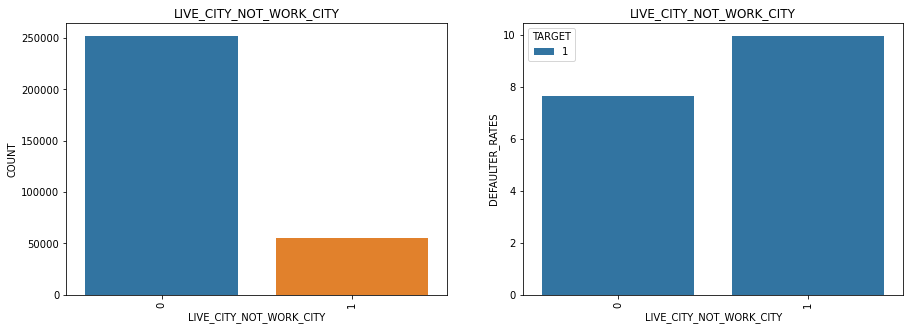

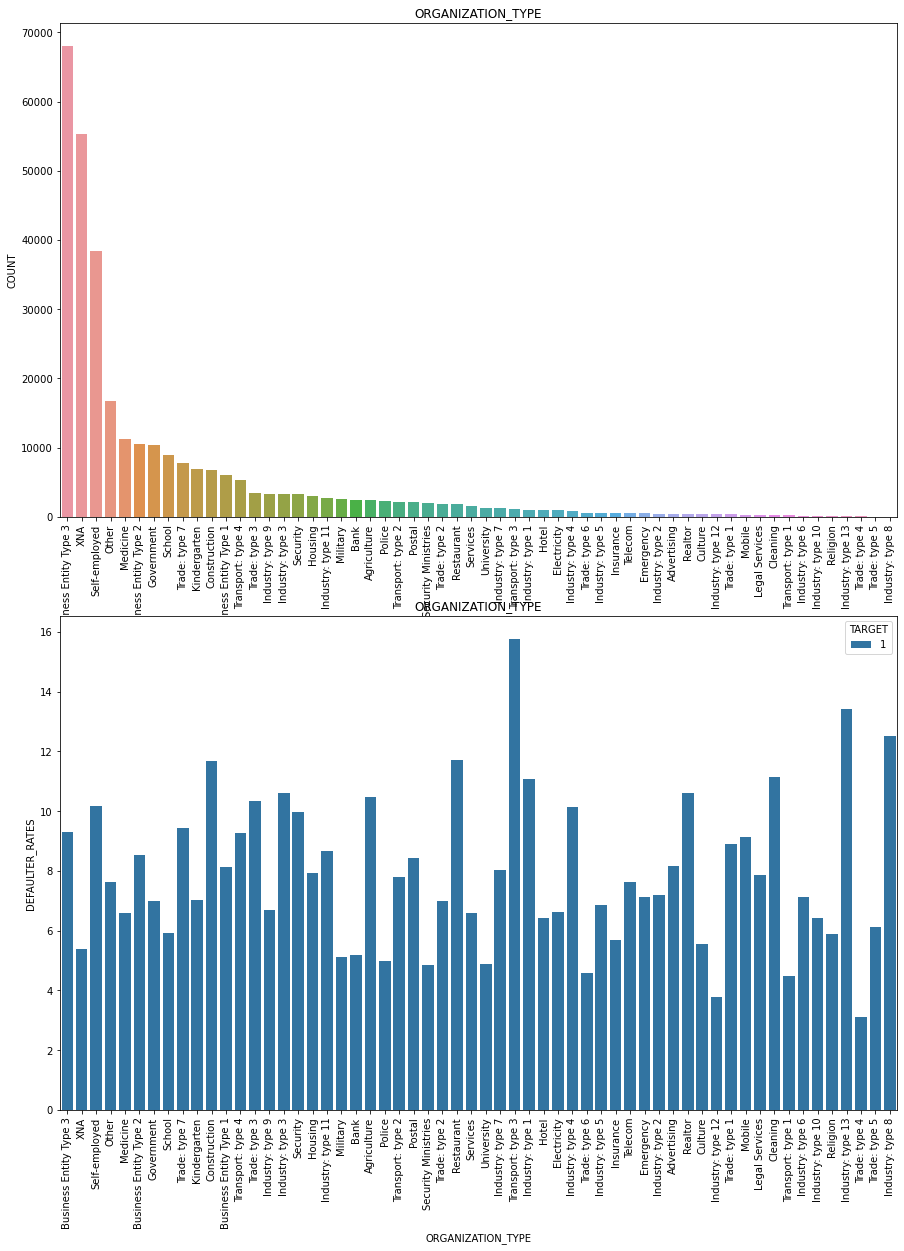

In [181]:
for col in cat:
    a = application.groupby([col]).count()[['SK_ID_CURR']].sort_values(['SK_ID_CURR'],ascending=False)
    a = a.rename(columns={'SK_ID_CURR':'COUNT'})
    a_target = application.groupby([col,"TARGET"]).count()[['SK_ID_CURR']]
    a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
    a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
    if(len(a)>25):
        a.reset_index(inplace=True)
        fig,ax = plt.subplots(2,1,figsize=(15,20))
    else:
        defaulter_rates = a.merge(a_target,on=col)
        display(defaulter_rates)
        a.reset_index(inplace=True)
        fig,ax = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x=col,y="COUNT",data=a,order=a[col],ax=ax[0])
    sns.barplot(x=col,y="DEFAULTER_RATES",hue="TARGET",data=a_target,order=a[col],ax=ax[1])
#     plt.title(col)
    ax[0].set_title(col)
    ax[1].set_title(col)
    ax[0].tick_params(axis='x',rotation=90)
    ax[1].tick_params(axis='x',rotation=90)
    plt.show()

In [182]:
a = application.groupby([col]).count()[['SK_ID_CURR']].sort_values(['SK_ID_CURR'],ascending=False)
a = a.rename(columns={'SK_ID_CURR':'COUNT'})
a_target = application.groupby([col,"TARGET"]).count()[['SK_ID_CURR']]
a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
defaulter_rates = a.merge(a_target,on=col)
display(defaulter_rates)

,ORGANIZATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Business Entity Type 3,67992,1,9.299623
1,XNA,55374,1,5.399646
2,Self-employed,38412,1,10.173904
3,Other,16683,1,7.642510
4,Medicine,11193,1,6.584472
5,Business Entity Type 2,10553,1,8.528381
6,Government,10404,1,6.978085
7,School,8893,1,5.914764
8,Trade: type 7,7831,1,9.449623
9,Kindergarten,6880,1,7.034884


In [218]:
defaulter_rates[defaulter_rates['DEFAULTER_RATES']>10].sort_values('DEFAULTER_RATES',ascending=False)

,ORGANIZATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
31,Transport: type 3,1187,1,15.754002
54,Industry: type 13,67,1,13.432836
57,Industry: type 8,24,1,12.500000
27,Restaurant,1811,1,11.706240
10,Construction,6721,1,11.679810
49,Cleaning,260,1,11.153846
32,Industry: type 1,1039,1,11.068335
15,Industry: type 3,3278,1,10.616229
43,Realtor,396,1,10.606061
21,Agriculture,2454,1,10.472698


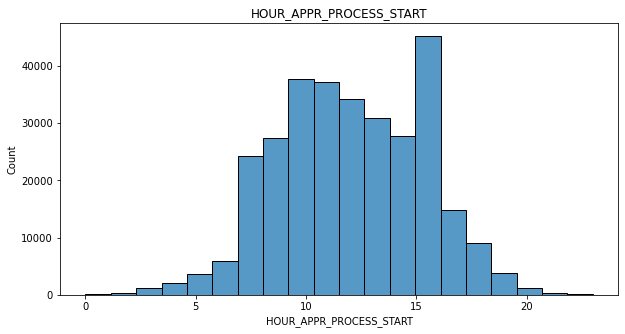

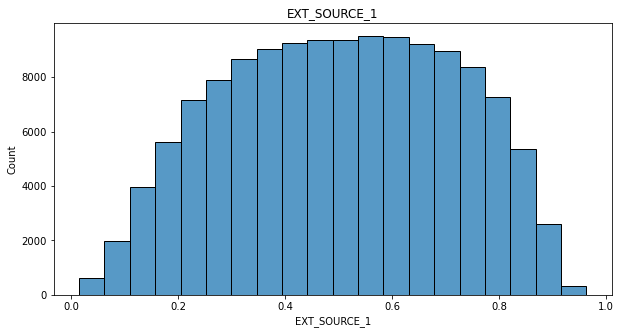

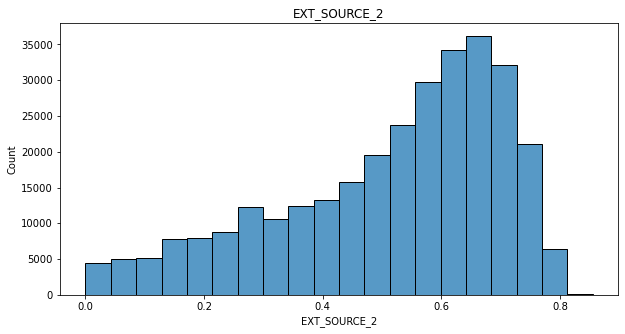

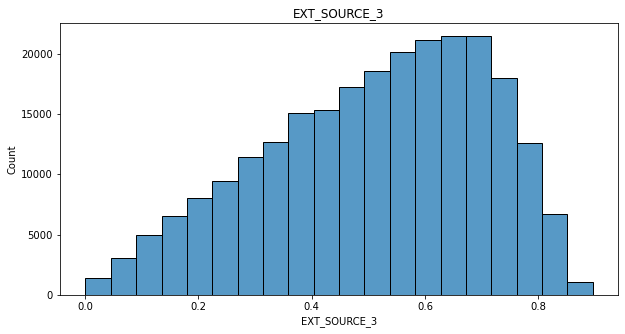

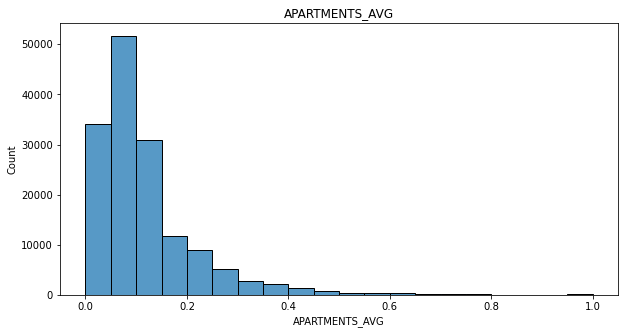

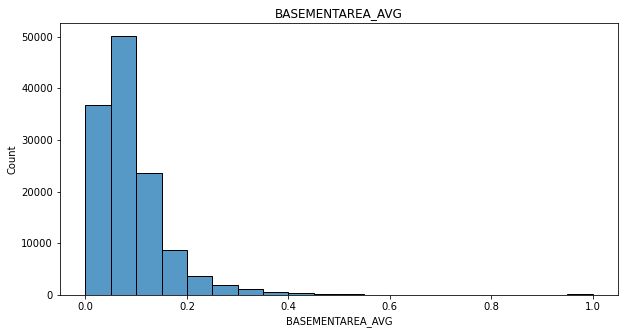

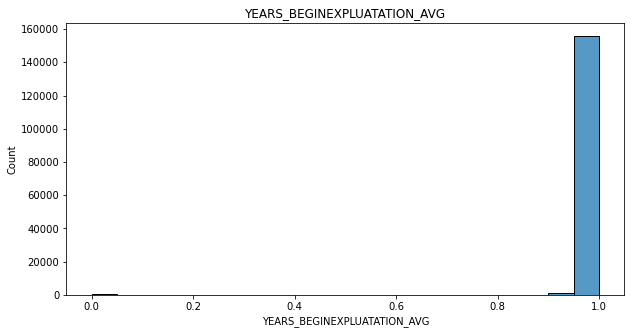

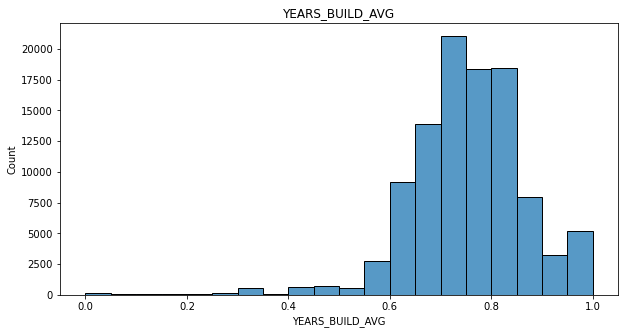

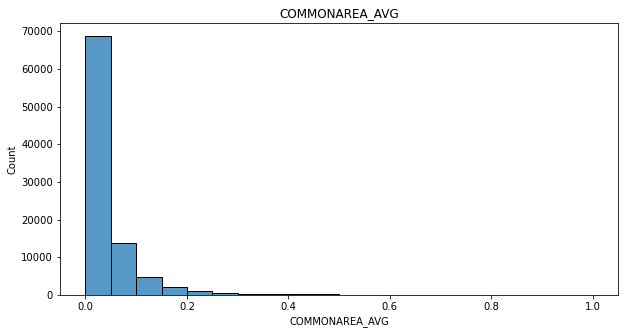

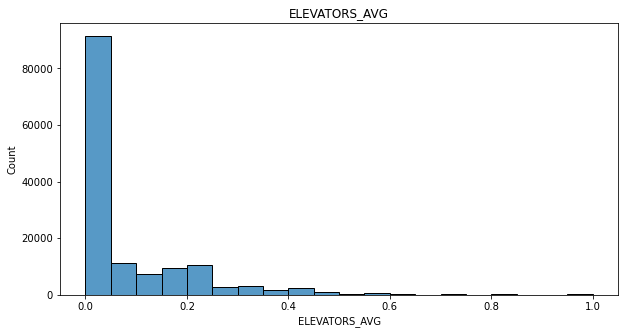

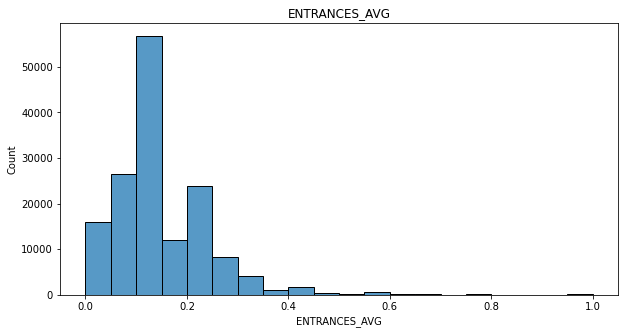

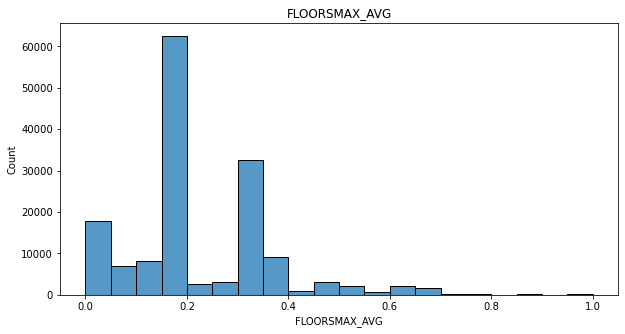

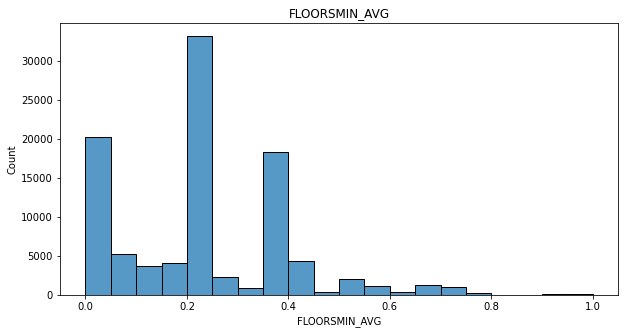

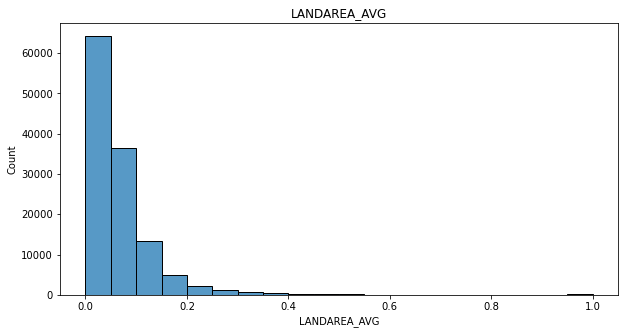

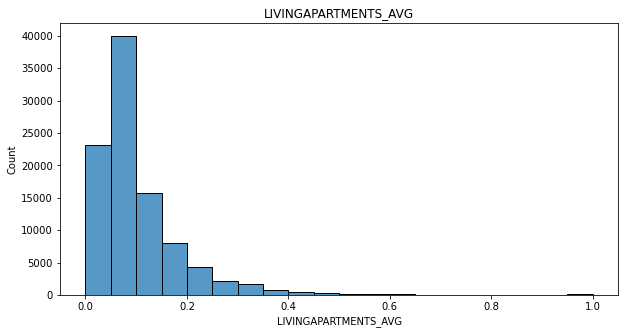

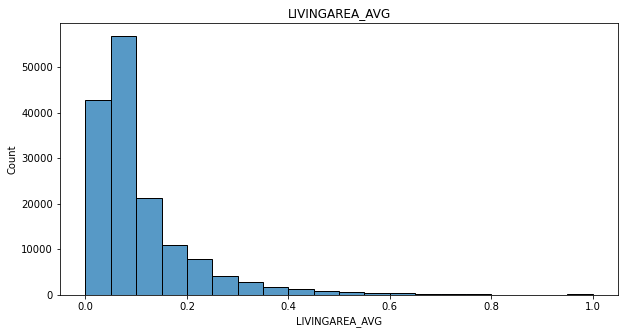

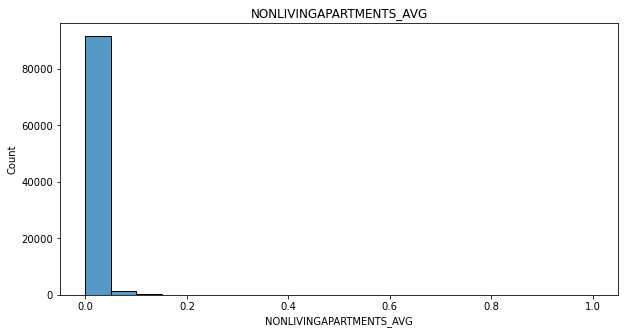

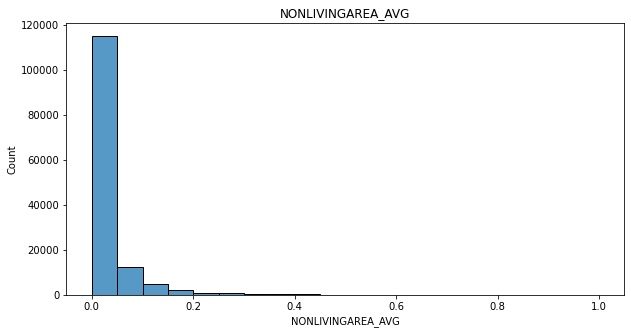

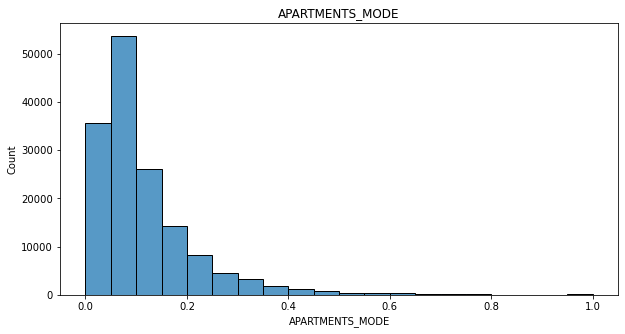

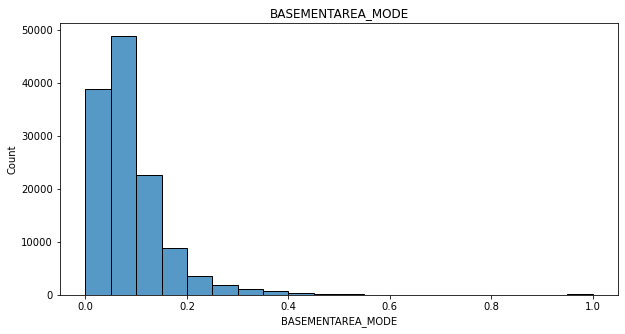

In [216]:
for col in num:
    plt.figure(figsize=(10,5))
    sns.histplot(application[col],bins=20)
    plt.title(col)
    plt.show()

In [220]:
application['EXT_SOURCE_1'].describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [226]:
q_bins = pd.DataFrame(pd.qcut(application['EXT_SOURCE_1'] , q=4))
q_bins.value_counts()

EXT_SOURCE_1                 
(0.334, 0.506]                   33534
(0.013600000000000001, 0.334]    33534
(0.675, 0.963]                   33533
(0.506, 0.675]                   33532
dtype: int64

In [227]:
num

Index(['HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE'],
      dtype='object')

,qbins,TARGET,DEFAULTER_RATES
1,"(0.013600000000000001, 0.334]",1,13.559373
3,"(0.334, 0.506]",1,7.771217
5,"(0.506, 0.675]",1,5.379936
7,"(0.675, 0.963]",1,3.271404


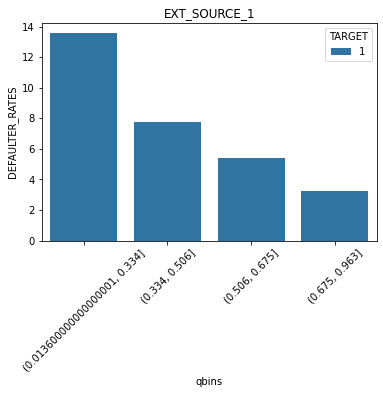

,qbins,TARGET,DEFAULTER_RATES
1,"(-0.0009999183, 0.392]",1,14.294280
3,"(0.392, 0.566]",1,8.174945
5,"(0.566, 0.664]",1,6.019840
7,"(0.664, 0.855]",1,3.803838


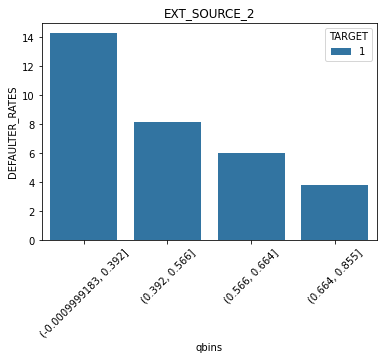

,qbins,TARGET,DEFAULTER_RATES
1,"(-0.000473, 0.371]",1,15.056539
3,"(0.371, 0.535]",1,7.510100
5,"(0.535, 0.669]",1,4.913313
7,"(0.669, 0.896]",1,3.523471


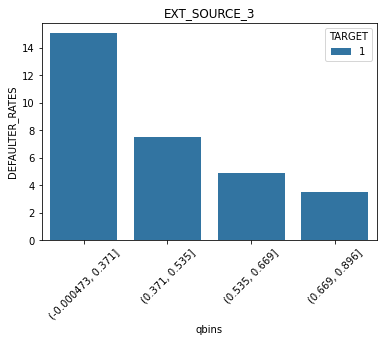

,qbins,TARGET,DEFAULTER_RATES
1,"(-0.001, 0.0577]",1,8.417324
3,"(0.0577, 0.0876]",1,6.805839
5,"(0.0876, 0.148]",1,6.579868
7,"(0.148, 1.0]",1,5.967696


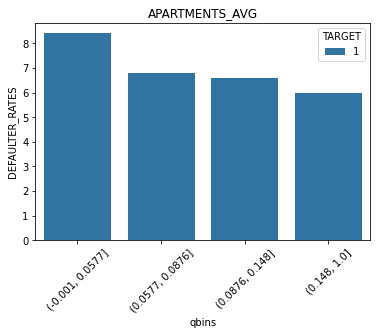

In [10]:
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3', 'APARTMENTS_AVG']:
    application['qbins'] = pd.qcut(application[col] , q=4)
    a_target = application.groupby(['qbins',"TARGET"]).count()[['SK_ID_CURR']]
    a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
    a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
    display(a_target)
    sns.barplot(x='qbins',y="DEFAULTER_RATES",hue='TARGET',data=a_target,order=a_target['qbins'])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()